<h1>Lesson 1. kNN on Iris dataset</h1>

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>R has numerous datasets built into the environment. You can see them using this command:</p>
<code>library(help=datasets)</code>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [1]:
str(iris)
head(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


<h3>Q.1. How many observations are present for each species?</h3>

In [2]:
# Put the command (or commands) here that would give an answer to the above question.
sp <- unique(iris$Species)
paste(sp[1], nrow(iris[iris$Species == sp[1], ]))
paste(sp[2], nrow(iris[iris$Species == sp[2], ]))
paste(sp[3], nrow(iris[iris$Species == sp[3], ]))

[1] "setosa 50"

[1] "versicolor 50"

[1] "virginica 50"

<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

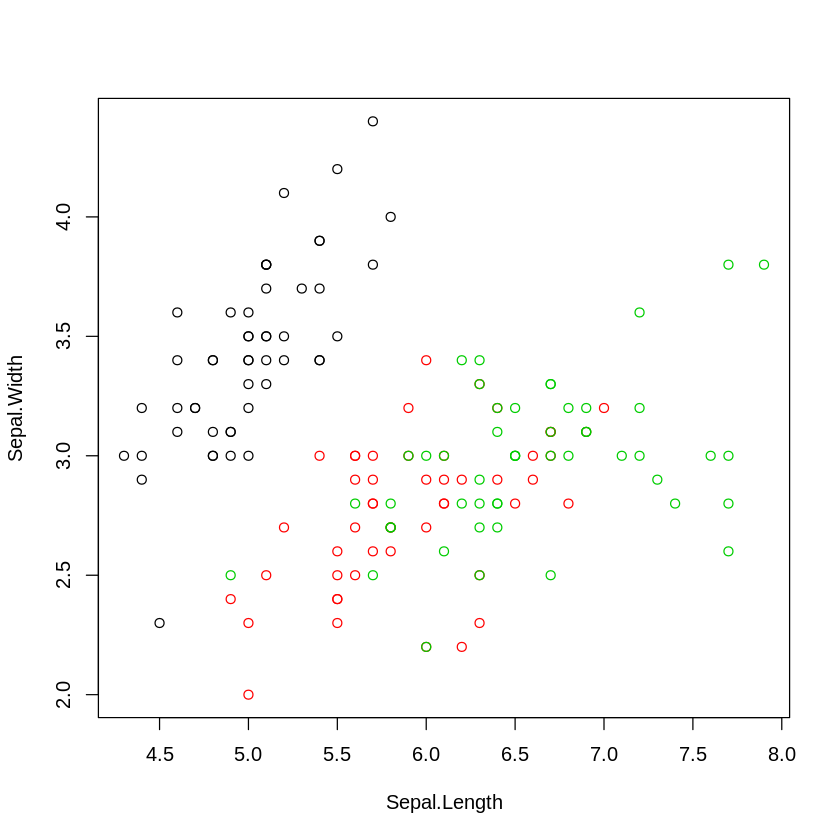

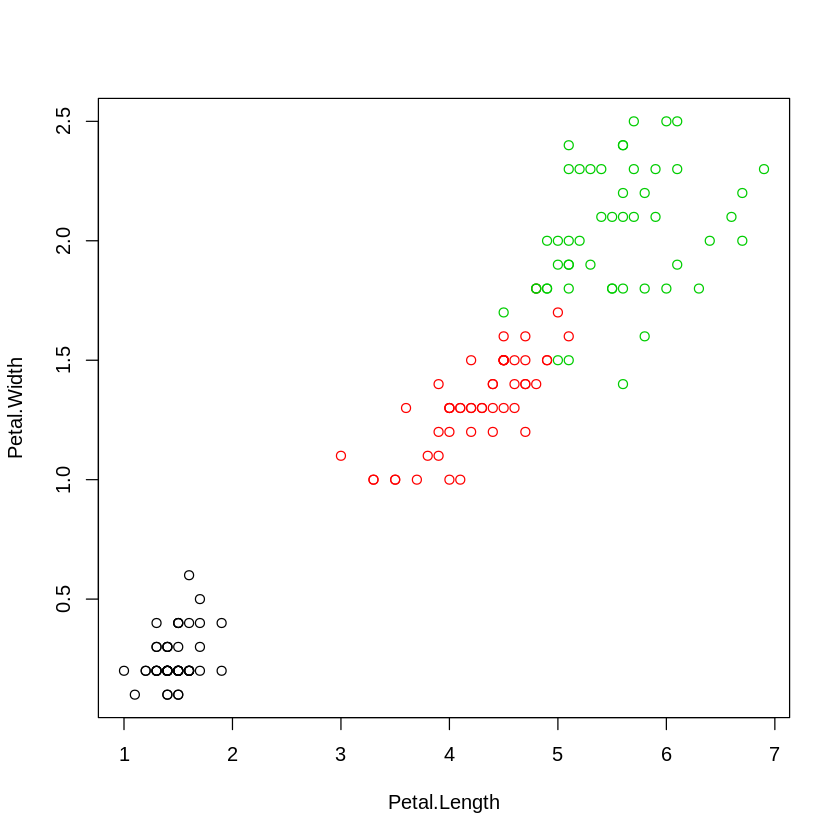

In [3]:
# Write the two plot commands here, e.g.:
plot(Sepal.Width ~ Sepal.Length, data=iris, col=Species)
plot(Petal.Width ~ Petal.Length, data=iris, col=Species)

<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

In [4]:
# Uncomment the correct answer and execute the cell
# Q.3 = "Sepal.Width vs. Sepal.Length"
Q.3 = "Petal.Width vs. Petal.Length"

After the initial exploratory data analysis, let's split the data into 70% train and 30% test, to prepare for k-NN modelling:

In [ ]:
set.seed(123)
idx <- sample(2, nrow(iris), replace=TRUE, prob=c(2/3, 1/3))
trainData <- iris[idx==1,]
testData <- iris[idx==2,]

### Q.4. On the Petal.Width vs. Petal.Length plot, display observations in train and test dataset in different colors.

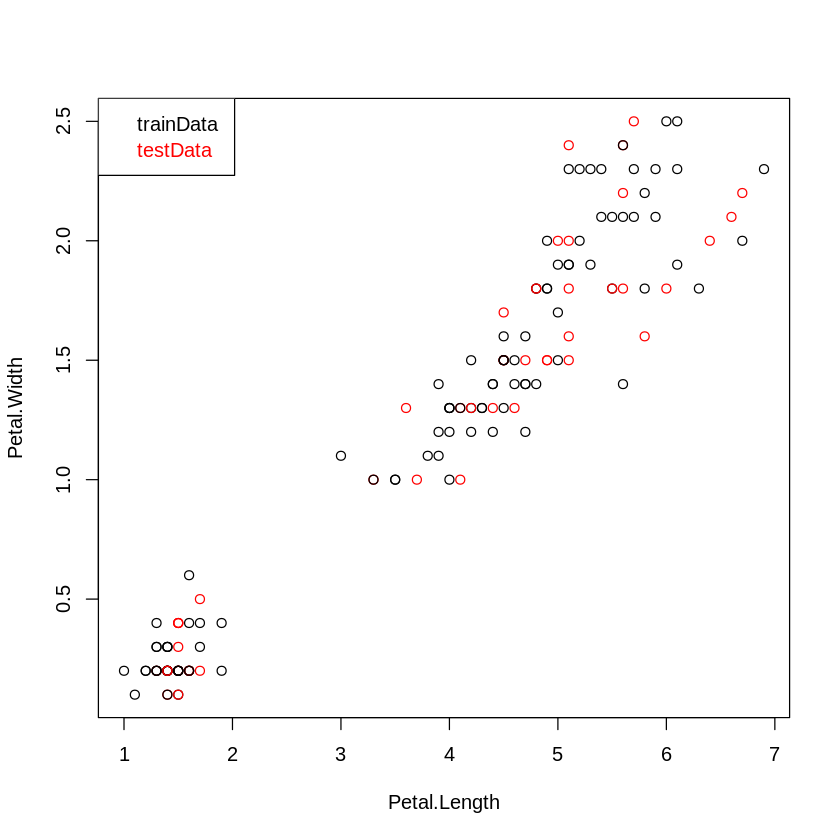

In [12]:
iris2 <- cbind(iris, idx)

plot(Petal.Width ~ Petal.Length, data = iris2, col = idx)
legend("topleft", legend = c("trainData", "testData"), text.col = c("black", "red"))

<h3>Q.5. Complete the R command that performs k-NN fit using Petal.Width and Petal.Length only using 3 neighbors.</h3>

In [7]:
# fit <- knn(train = trainData[,c("Petal.Width", "Petal.Length")], test = testData..., cl= trainData..., k=...) 

fit <- class::knn(train = trainData[,c("Petal.Width", "Petal.Length")], 
                  test = testData[,c("Petal.Width", "Petal.Length")], 
                  cl = trainData$Species, 
                  k = 3)

<h3>Q.6. How many class labels did your model predict correctly in the test set?</h3>

In [8]:
# compare testData labels versus fit (predicted) labels
correct <- fit == testData$Species
length(which(x = correct, arr.ind = TRUE)) #==> 46/50 labels correctly predicted when only Petal.Width and Petal.Length are used as predictors


[1] 46

### <h3>Q.7. How many classes did your model predict correctly, if you use all the features?</h3>

In [9]:
# Fit with all the features
fit2 <- class::knn(train = trainData[,c("Petal.Width", "Petal.Length", "Sepal.Width", "Sepal.Length")], 
                   test = testData[,c("Petal.Width", "Petal.Length", "Sepal.Width", "Sepal.Length")], 
                   cl= trainData$Species, 
                   k=3)

correct2 <- fit2 == testData$Species
length(which(x = correct2, arr.ind = TRUE)) #==> 47/50 class labels predicted correctly

# Evaluate the accuracy (ASSUMING QUESTION PERTAINS TO TEST ERROR RATE): 1.0 - fraction_wrong
wrong <- length(which(x = !correct2, arr.ind = TRUE))
test_error_rate <- wrong / nrow(testData)
accuracy <- 1.0 - test_error_rate

wrong
test_error_rate
accuracy

[1] 47

[1] 3

[1] 0.06

[1] 0.94

<h3>Q.8. Plot the model accuracy on the test set vs. number of neighbors used in the model (from 1 to 10).</h3>

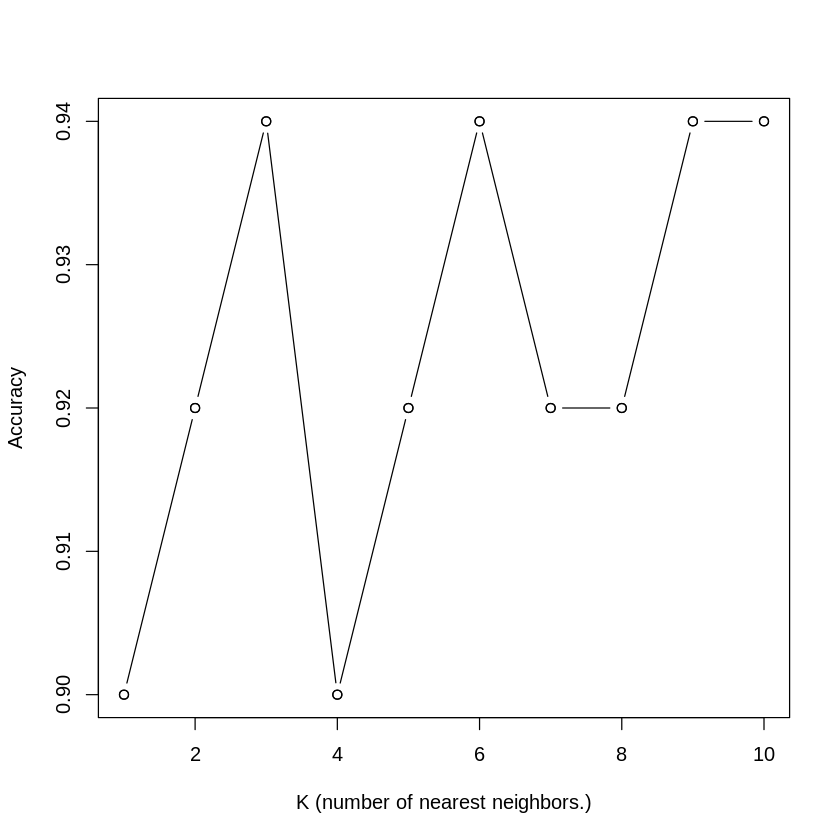

In [10]:
accuracy <- c()
for(n in 1:10) 
{
    # Fit the model with all the features
    fit <- class::knn(train = trainData[,c("Petal.Width", "Petal.Length", "Sepal.Width", "Sepal.Length")], 
                      test = testData[,c("Petal.Width", "Petal.Length", "Sepal.Width", "Sepal.Length")], 
                      cl = trainData$Species, 
                      k = n)
    
    correct <- fit == testData$Species
    #length(which(x = correct, arr.ind = TRUE))
    
    # Evaluate accuracy and store it in the variable
    wrong <- length(which(x = !correct, arr.ind = TRUE))
    test_error_rate <- wrong / nrow(testData)
    accuracy[n] <- 1.0 - test_error_rate
}

# Plot the result
plot(x = 1:10, y = accuracy, ylab = "Accuracy", xlab = "K (number of nearest neighbors.)")
lines(x = 1:10, y = accuracy, type = "b")

<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

In [11]:
# 1. use of cross-validation
# 2. use of multiple training data sets
# 3. use of more flexible models (but this comes at expense of model interpretability)